In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

This code is used to set up the environment for data processing, visualization, and modeling tasks. It begins by importing several libraries and modules that are commonly used in these tasks.

Firstly, the 'numpy' library is imported and given the alias 'np'. Numpy provides various mathematical functions and tools for working with arrays and matrices. It is widely used for numerical computations in Python.

Next, the code imports the 'matplotlib.pyplot' module and assigns it the alias 'plt'. This module is used for creating visualizations, particularly plots and charts. It provides a wide range of functions to generate different types of plots and customize their appearance.

The code also sets the style of the plots to 'fivethirtyeight'. This is a popular visual style for data visualization that is known for its clean and modern look. By using this style, the resulting plots will have a consistent aesthetic.

In addition, the 'pandas' library is imported and given the alias 'pd'. Pandas is a powerful library for data manipulation and analysis. It provides data structures, such as DataFrames, and a wide range of functions for handling and processing data.

The 'MinMaxScaler' class is imported from the 'sklearn.preprocessing' module. This class is used for scaling data to a specific range, typically between 0 and 1. It is commonly used in machine learning tasks to normalize the data and bring it into a suitable range for modeling.

The code then imports several classes from the 'keras' library, which is a popular deep learning library. The 'Sequential' class represents a linear stack of layers in a neural network model. The 'Dense', 'LSTM', 'Dropout', 'GRU', and 'Bidirectional' classes define different types of layers that can be added to a neural network model. These classes are building blocks for constructing deep learning models.

Furthermore, the 'SGD' optimizer is imported from the 'keras.optimizers' module. SGD stands for Stochastic Gradient Descent, which is a popular optimization algorithm used to train neural network models. It adjusts the model's parameters iteratively to minimize the loss function.

The 'math' module is imported, which provides mathematical functions and constants. It can be used for various mathematical operations and calculations.

Lastly, the code imports the 'mean_squared_error' function from the 'sklearn.metrics' module. This function calculates the mean squared error between predicted and actual values. It is a common metric used to evaluate the performance of regression models.

In summary, this code sets up the necessary environment for data processing, visualization, and modeling tasks by importing various libraries, modules, and classes. These tools provide the functionality needed to manipulate data, create visualizations, and build deep learning models.

In [99]:
import pandas as pd
import quandl
import datetime
start = datetime.datetime(2006,1,1)
end = datetime.date.today()
amz = quandl.get("WIKI/AMZN", start_date=start, end_date=end)

This code performs several tasks related to retrieving historical stock price data for Amazon (AMZN) using the Quandl platform.

Firstly, the 'pandas' library is imported and given the alias 'pd'. Pandas is a powerful library in Python used for data manipulation and analysis. It provides data structures and functions that make it easier to work with structured data, such as tables or spreadsheets.

Next, the code imports the 'quandl' module, which allows access to a wide range of financial, economic, and alternative datasets through the Quandl platform. Quandl is a popular data provider that offers a comprehensive collection of historical data.

The 'datetime' module is also imported. This module provides classes and functions for working with dates and times in Python. It enables operations such as creating, formatting, and manipulating dates and times.

The code then defines a 'start' variable using the 'datetime.datetime' class. This variable represents the starting date for retrieving the historical stock price data. In this case, the start date is set to January 1, 2006.

Similarly, an 'end' variable is created using the 'datetime.date.today()' function. This variable represents the current date, which serves as the end date for retrieving the data. By using the 'datetime.date.today()' function, the code automatically sets the end date to the present day.

Finally, the code uses the 'quandl.get' function to fetch the historical stock price data for Amazon. It specifies the dataset to be retrieved as "WIKI/AMZN", indicating the stock price data for Amazon from the WIKI database on Quandl. The function takes the 'start' and 'end' dates as parameters to determine the time range for which the data is retrieved.

The retrieved data is stored in the 'amz' variable, which can be further analyzed, processed, or visualized using the functionalities provided by the 'pandas' library.

In summary, this code sets up the necessary environment for retrieving historical stock price data for Amazon. It imports the required libraries, defines the start and end dates for data retrieval, and utilizes the Quandl platform to fetch the desired dataset. The resulting data is stored in a variable for further analysis or use.

In [106]:
amz.shape

(3077, 12)

The code snippet `amz.shape` retrieves the shape of the 'amz' variable, which typically represents a dataset or array-like structure. 

The `shape` attribute returns a tuple that provides information about the dimensions of the data. The first element of the tuple represents the number of rows or observations, while the second element represents the number of columns or variables in the dataset.

By executing `amz.shape`, the code retrieves the dimensions of the 'amz' dataset, indicating the number of rows and columns it contains. This information is useful for understanding the size and structure of the dataset, and it can help with various data analysis and manipulation tasks.

In [21]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Amazon Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Amazon Stock Price')
    plt.title('Amazon Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Amazon Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

The given code defines two functions: `plot_predictions` and `return_rmse`. These functions are designed to assist with data visualization and error evaluation in the context of stock price prediction.

The `plot_predictions` function takes two parameters, `test` and `predicted`, which represent the actual and predicted stock prices, respectively. It utilizes the 'matplotlib.pyplot' library to create a plot with two lines: one representing the real Amazon stock prices and the other representing the predicted stock prices. The function also sets the title, labels for the axes, and a legend. Finally, it displays the plot on the screen.

The `return_rmse` function calculates the root mean squared error (RMSE) between the `test` and `predicted` values. The RMSE is a commonly used metric to measure the accuracy of a regression model. It quantifies the average difference between the predicted and actual values. The function utilizes the 'math.sqrt' and 'mean_squared_error' functions to compute the RMSE, and then it prints the result as a formatted string.

Overall, these functions provide a convenient way to visualize predicted stock prices compared to the actual prices and to evaluate the performance of a prediction model using the RMSE metric.

In [102]:
dataset = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

Open   High    Low  Close   Volume  Name
Date                                                 
2006-01-03  47.47  47.85  46.25  47.58  7582127  AMZN
2006-01-04  47.48  47.73  46.69  47.25  7440914  AMZN
2006-01-05  47.16  48.20  47.11  47.65  5417258  AMZN
2006-01-06  47.97  48.58  47.32  47.87  6154285  AMZN
2006-01-09  46.55  47.10  46.40  47.08  8945056  AMZN

This code reads a CSV file named 'AMZN_2006-01-01_to_2018-01-01.csv' and assigns its contents to a variable called 'dataset'. The CSV file is expected to contain stock price data for Amazon (AMZN) within a specific time range.

The 'pd.read_csv' function from the pandas library is used to read the CSV file. It takes the file path as a parameter and loads the data into a pandas DataFrame. The 'index_col' parameter is set to 'Date', indicating that the 'Date' column in the CSV file should be used as the index for the DataFrame. The 'parse_dates' parameter is set to ['Date'], which instructs pandas to interpret the 'Date' column as a datetime data type.

After loading the data into the 'dataset' DataFrame, the 'dataset.head()' function is called. This function displays the first few rows of the DataFrame, providing a preview of the data. By default, it shows the first five rows.

In summary, this code reads a CSV file containing Amazon stock price data, assigns it to a DataFrame called 'dataset', and then displays the first few rows of the DataFrame. This allows for an initial exploration of the data and understanding of its structure.

In [104]:
dataset.shape

(3019, 6)

The code snippet `dataset.shape` retrieves the shape of the 'dataset' variable, which is typically a pandas DataFrame or a similar data structure.

The `shape` attribute returns a tuple that provides information about the dimensions of the data. The first element of the tuple represents the number of rows or observations in the dataset, while the second element represents the number of columns or variables.

By executing `dataset.shape`, the code retrieves the dimensions of the 'dataset' variable, indicating the number of rows and columns it contains. This information is useful for understanding the size and structure of the dataset, and it can help with various data analysis and manipulation tasks.

In [8]:
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

This code divides the 'dataset' into two sets: a training set and a test set, based on specific date ranges.

The training set is extracted from the 'dataset' variable and includes data up to the year 2016. It selects the data using the slicing notation `[:'2016']`, which includes all rows from the beginning of the dataset up to (but not including) the year 2016. The `.iloc[:,1:2]` part specifies that only the second column (index 1) of the dataset is included in the training set. The `.values` at the end returns the selected data as a NumPy array.

On the other hand, the test set is extracted from the 'dataset' and contains data from the year 2017 onwards. It uses the slicing notation `['2017':]`, which includes all rows starting from the year 2017 until the end of the dataset. Similar to the training set, the `.iloc[:,1:2]` part ensures that only the second column of the dataset is included. The `.values` at the end returns the selected data as a NumPy array.

In summary, this code separates the 'dataset' into a training set and a test set based on specific date ranges. The training set contains data up to the year 2016, while the test set includes data from the year 2017 onwards. Both sets consist of values from the second column of the original dataset and are stored as NumPy arrays.

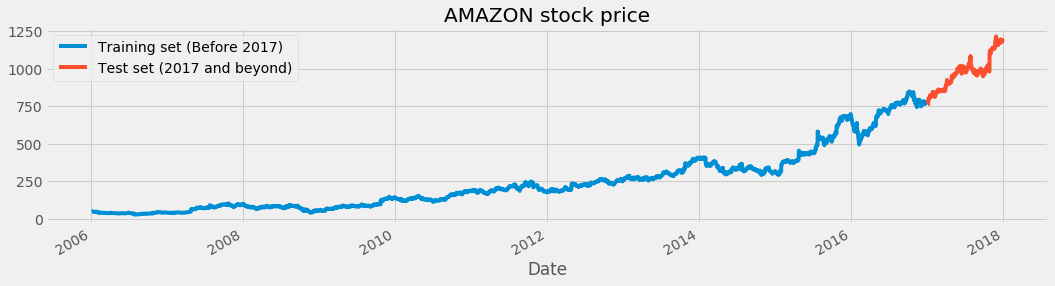

In [10]:
#We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('AMAZON stock price')
plt.show()


This code generates a plot to visualize the historical stock prices of Amazon (AMZN) based on the 'High' attribute. The plot is divided into two parts to represent the training set and the test set, corresponding to different time periods.

The first part of the code, `dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)`, plots the 'High' attribute of the 'dataset' variable for the data up until the year 2016. It uses the 'plot' function from the pandas library to create the plot. The 'figsize' parameter sets the size of the figure, and 'legend=True' displays the legend in the plot.

The second part of the code, `dataset["High"]['2017':].plot(figsize=(16,4),legend=True)`, plots the 'High' attribute of the 'dataset' variable for the data from the year 2017 onwards. This part uses the same 'plot' function but with a different slicing notation to select the data from the year 2017 onwards.

After plotting both parts, the code adds a legend to the plot using the 'plt.legend' function. It specifies the labels for the legend as 'Training set (Before 2017)' and 'Test set (2017 and beyond)' to distinguish the two parts of the plot.

Lastly, the code sets the title of the plot using the 'plt.title' function to indicate that it represents the stock price of Amazon. The plot is then displayed using the 'plt.show' function.

In summary, this code generates a plot that visualizes the historical stock prices of Amazon based on the 'High' attribute. The plot is divided into a training set (data before 2017) and a test set (data from 2017 onwards), with the legend indicating the corresponding time periods. The plot provides an overview of the stock price trends over time.

In [11]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

This code performs data scaling on the training set using the MinMaxScaler.

The 'MinMaxScaler' class is used from the 'sklearn.preprocessing' module. It is a commonly used scaling technique that transforms the data to a specific range, typically between 0 and 1. Scaling the data is beneficial for many machine learning algorithms as it helps in normalizing the data and bringing it into a consistent range.

The 'fit_transform' method of the 'MinMaxScaler' class is applied to the 'training_set' variable. It computes the minimum and maximum values of the training set and performs the necessary transformations to scale the data. The scaled data is then assigned to the 'training_set_scaled' variable.

In summary, this code scales the values in the training set using the MinMaxScaler, ensuring that the data is normalized and falls within a specified range. The scaled data is stored in the 'training_set_scaled' variable and can be used for further analysis or model training.

Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output. So for each element of training set, we have 60 previous training set elements 

In [ ]:
X_train = []
y_train = []
for i in range(60,2768):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

This code prepares the training data for a machine learning model by creating input sequences and corresponding target values.

The code initializes empty lists, 'X_train' and 'y_train', which will be used to store the input sequences and target values, respectively.

It then iterates over a range of indices from 60 to 2768 using a for loop. This range represents the indices of the training set data.

Within each iteration, it appends a sequence of 60 consecutive elements from the 'training_set_scaled' to the 'X_train' list. The sequence is obtained by using the slicing notation '[i-60:i,0]', which selects a range of values from index 'i-60' to 'i' in the first column (index 0) of the 'training_set_scaled'.

Additionally, it appends the element at index 'i' from the 'training_set_scaled' to the 'y_train' list. This element represents the target value corresponding to the input sequence.

After the loop completes, the 'X_train' and 'y_train' lists are converted into NumPy arrays using the 'np.array' function, creating the final training data in the form of input sequences ('X_train') and target values ('y_train').

In summary, this code creates input sequences and target values from the scaled training set data. The input sequences are constructed by selecting a range of 60 consecutive elements, while the corresponding target values are single elements. These sequences and target values are stored as NumPy arrays, forming the training data for a machine learning model.

In [16]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

This code reshapes the 'X_train' data to make it compatible with the input requirements of a specific modeling approach, such as a recurrent neural network (RNN).

The 'X_train' variable represents the input sequences of the training data. Each input sequence is a set of consecutive values from the original dataset. However, certain models, like RNNs, expect a specific input shape with dimensions representing the number of samples, the length of each sequence, and the number of features.

To meet these requirements, the code uses the 'np.reshape' function from the NumPy library. It reshapes the 'X_train' array by specifying the desired shape as (X_train.shape[0], X_train.shape[1], 1). This reshaping operation ensures that the dimensions of the 'X_train' array correspond to the number of samples, the length of each sequence, and the number of features (in this case, 1).

By reshaping the 'X_train' array, the code modifies its structure to align with the input expectations of the modeling approach to be used. This ensures that the data can be efficiently processed and utilized during the model training process.

In [29]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
2708/2708 [==============================] - 16s 6ms/step - loss: 0.0107
Epoch 2/5
2708/2708 [==============================] - 13s 5ms/step - loss: 0.0045
Epoch 3/5
2708/2708 [==============================] - 13s 5ms/step - loss: 0.0036
Epoch 4/5
2708/2708 [==============================] - 13s 5ms/step - loss: 0.0030
Epoch 5/5
2708/2708 [==============================] - 13s 5ms/step - loss: 0.0025


This code defines and trains a specific type of recurrent neural network (RNN) architecture called Long Short-Term Memory (LSTM) for a regression task.

The code begins by creating an empty sequential model called 'regressor' using the 'Sequential' class from the Keras library. This model will serve as the container for the LSTM layers and other components.

Next, the code adds several LSTM layers to the model. Each LSTM layer is added using the 'regressor.add' function. The 'units' parameter specifies the number of memory cells or units in each LSTM layer. The 'return_sequences' parameter is set to 'True' for all but the last LSTM layer, indicating that each layer should return sequences rather than just the final output. The 'Dropout' layer is also added after each LSTM layer with a dropout rate of 0.2. Dropout is a regularization technique that helps prevent overfitting in neural networks.

After adding the LSTM layers, a final output layer is added using the 'regressor.add' function, consisting of a dense layer with a single unit. This layer is responsible for producing the regression output.

The next step involves compiling the RNN model using the 'regressor.compile' function. The 'optimizer' parameter is set to 'rmsprop', which is an optimization algorithm commonly used for training RNNs. The 'loss' parameter is set to 'mean_squared_error', indicating that the mean squared error is used as the loss function to measure the model's performance.

Finally, the model is trained using the 'regressor.fit' function. It takes the preprocessed training data ('X_train' and 'y_train') as input, along with additional parameters such as the number of epochs (5) and the batch size (32). During the training process, the model iteratively adjusts its weights and biases to minimize the mean squared error loss between the predicted and actual values.

In summary, this code defines and trains an LSTM-based RNN model for regression. The model consists of multiple LSTM layers with dropout regularization, an output layer, and is trained using the mean squared error loss function.

Now to get the test set ready in a similar way as the training set.The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
'High' attribute data for processing

In [30]:
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

This code preprocesses the input data for making predictions by combining the 'High' attribute values from two subsets of the 'dataset' and scaling them.

The 'dataset_total' variable is created by concatenating two subsets of the 'High' attribute from the 'dataset'. The first subset contains data up until the year 2016, and the second subset contains data from the year 2017 onwards. Concatenation is performed using the 'pd.concat' function from the pandas library, with the 'axis=0' parameter specifying the concatenation along the vertical axis.

The 'inputs' variable is then defined by extracting a portion of the 'dataset_total' array. Specifically, it selects a range of values starting from a position that is calculated as the length of 'dataset_total' minus the length of the 'test_set' minus 60. This ensures that the inputs align with the time period of the test set and include the necessary preceding values for making predictions.

The 'inputs' array is reshaped using the 'reshape' method, where '-1' in the reshaping operation indicates that the dimension is inferred based on the length of the input array. The reshaping is done to ensure that the 'inputs' array has a single feature dimension, as expected by the subsequent operations.

Lastly, the 'sc.transform' function is applied to scale the 'inputs' array. The 'sc' object represents the MinMaxScaler that was previously used to scale the training set. By calling 'transform' on 'sc' and passing the 'inputs' array as a parameter, the 'inputs' are scaled to align with the same scaling applied to the training set.

In summary, this code combines subsets of the 'High' attribute from the 'dataset', extracts a portion of the combined data to form the 'inputs' array, reshapes the 'inputs' array, and scales it using the same scaling transformation as applied to the training set. These steps prepare the input data for further processing and making predictions.

In [31]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

This code prepares the input data for testing and uses a trained model to predict stock prices.

First, an empty list called 'X_test' is created to store the input sequences for testing.

Using a for loop, the code iterates over a range of indices from 60 to 311. This range represents the indices of the 'inputs' array, which was previously prepared and scaled.

Within each iteration, the code appends a sequence of 60 consecutive elements from the 'inputs' array to the 'X_test' list. The sequence is obtained by using the slicing notation '[i-60:i,0]', which selects a range of values from index 'i-60' to 'i' in the first column (index 0) of the 'inputs' array. These sequences serve as input data for making predictions.

After the loop completes, the 'X_test' list is converted into a NumPy array using the 'np.array' function.

Next, the 'X_test' array is reshaped to match the input shape expected by the trained model. The reshaping is performed using the 'np.reshape' function, with the desired shape specified as (X_test.shape[0], X_test.shape[1], 1). This ensures that the dimensions of the 'X_test' array align with the number of samples, the length of each sequence, and the number of features (in this case, 1).

The trained model, 'regressor', is then used to predict the stock prices based on the prepared 'X_test' input. The 'predict' method is called on 'regressor' with 'X_test' as the input, resulting in an array of predicted stock prices.

To obtain the actual stock price values from the predicted values, the 'inverse_transform' method is applied to the 'predicted_stock_price' array. This method uses the scaling transformation applied earlier to revert the scaled values back to their original scale.

In summary, this code prepares the input data for testing by creating sequences from the scaled 'inputs' array. It reshapes the 'X_test' array to match the input shape expected by the model. The trained model is then used to predict the stock prices for the prepared 'X_test' input. Finally, the predicted stock prices are transformed back to their original scale.

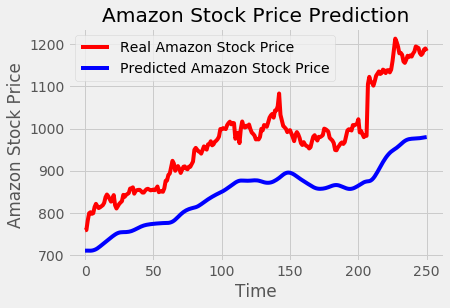

In [32]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

This code generates a visualization of the predicted stock prices from an LSTM model and compares them to the actual stock prices.

It calls the function 'plot_predictions' and passes two parameters: 'test_set' and 'predicted_stock_price'. The 'test_set' represents the actual stock prices, while 'predicted_stock_price' contains the predicted stock prices from the LSTM model.

The 'plot_predictions' function uses the 'matplotlib.pyplot' library to create a plot. It plots the 'test_set' as a red line to represent the actual stock prices. Additionally, it plots the 'predicted_stock_price' as a blue line to represent the predicted stock prices.

The plot is titled 'Amazon Stock Price Prediction' using the 'plt.title' function. The x-axis is labeled as 'Time' with the 'plt.xlabel' function, and the y-axis is labeled as 'Amazon Stock Price' with the 'plt.ylabel' function. The 'plt.legend' function adds a legend to the plot to differentiate between the actual and predicted stock prices.

Finally, the plot is displayed on the screen using the 'plt.show' function.

In summary, this code visualizes the predicted stock prices from an LSTM model and compares them to the actual stock prices. The plot helps to visualize the accuracy of the model's predictions and understand the trend and pattern of the stock prices.

In [24]:
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 134.9467274015809.


This code calculates and prints the root mean squared error (RMSE) between the predicted stock prices and the actual stock prices.

It calls the function 'return_rmse' and passes two parameters: 'test_set' and 'predicted_stock_price'. The 'test_set' represents the actual stock prices, while 'predicted_stock_price' contains the predicted stock prices from the model.

The 'return_rmse' function calculates the RMSE by using the 'mean_squared_error' function from the 'sklearn.metrics' module. It takes the 'test_set' and 'predicted_stock_price' as input and computes the square root of the mean squared error between them. The RMSE quantifies the average difference between the predicted and actual stock prices.

The calculated RMSE value is then printed as a formatted string, providing a measure of the accuracy of the model's predictions.

In summary, this code calculates the RMSE between the predicted stock prices and the actual stock prices and prints the RMSE value. The RMSE serves as a metric to evaluate the performance of the model, indicating how well the predicted values align with the actual values.

In [26]:
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=5,batch_size=150)

Epoch 1/5
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0588
Epoch 2/5
2708/2708 [==============================] - 4s 2ms/step - loss: 0.0194
Epoch 3/5
2708/2708 [==============================] - 4s 2ms/step - loss: 0.0031
Epoch 4/5
2708/2708 [==============================] - 4s 2ms/step - loss: 0.0027
Epoch 5/5
2708/2708 [==============================] - 4s 2ms/step - loss: 0.0021


This code defines and trains a specific type of recurrent neural network (RNN) architecture called Gated Recurrent Unit (GRU) for a regression task.

The code begins by creating an empty sequential model called 'regressorGRU' using the 'Sequential' class from the Keras library. This model will serve as the container for the GRU layers and other components.

Next, the code adds several GRU layers to the model. Each GRU layer is added using the 'regressorGRU.add' function. The 'units' parameter specifies the number of memory cells or units in each GRU layer. The 'return_sequences' parameter is set to 'True' for all GRU layers except the last one, indicating that each layer should return sequences rather than just the final output. The 'input_shape' parameter specifies the shape of the input data, which is based on the shape of 'X_train'. The 'activation' parameter is set to 'tanh', which is the activation function used in the GRU layers.

After adding the GRU layers, a final output layer is added using the 'regressorGRU.add' function. It consists of a dense layer with a single unit. This layer is responsible for producing the regression output.

The next step involves compiling the RNN model using the 'regressorGRU.compile' function. The 'optimizer' parameter is set to 'SGD', which stands for Stochastic Gradient Descent, and specific parameters are provided to configure the optimizer, such as the learning rate ('lr'), decay, momentum, and Nesterov momentum. The 'loss' parameter is set to 'mean_squared_error', indicating that the mean squared error is used as the loss function to measure the model's performance.

Finally, the model is trained using the 'regressorGRU.fit' function. It takes the preprocessed training data ('X_train' and 'y_train') as input, along with additional parameters such as the number of epochs (5) and the batch size (150). During the training process, the model iteratively adjusts its weights and biases to minimize the mean squared error loss between the predicted and actual values.

In summary, this code defines and trains a GRU-based RNN model for regression. The model consists of multiple GRU layers with dropout regularization, an output layer, and is trained using the mean squared error loss function.

In [27]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

This code prepares the input data for testing and uses a trained GRU model to predict stock prices.

First, an empty list called 'X_test' is created to store the input sequences for testing.

Using a for loop, the code iterates over a range of indices from 60 to 311. This range represents the indices of the 'inputs' array, which was previously prepared and scaled.

Within each iteration, the code appends a sequence of 60 consecutive elements from the 'inputs' array to the 'X_test' list. The sequence is obtained by using the slicing notation '[i-60:i,0]', which selects a range of values from index 'i-60' to 'i' in the first column (index 0) of the 'inputs' array. These sequences serve as input data for making predictions.

After the loop completes, the 'X_test' list is converted into a NumPy array using the 'np.array' function.

Next, the 'X_test' array is reshaped to match the input shape expected by the trained GRU model. The reshaping is performed using the 'np.reshape' function, with the desired shape specified as (X_test.shape[0], X_test.shape[1], 1). This ensures that the dimensions of the 'X_test' array align with the number of samples, the length of each sequence, and the number of features (in this case, 1).

The trained GRU model, 'regressorGRU', is then used to predict the stock prices based on the prepared 'X_test' input. The 'predict' method is called on 'regressorGRU' with 'X_test' as the input, resulting in an array of predicted stock prices.

To obtain the actual stock price values from the predicted values, the 'inverse_transform' method is applied to the 'GRU_predicted_stock_price' array. This method uses the scaling transformation applied earlier to revert the scaled values back to their original scale.

In summary, this code prepares the input data for testing by creating sequences from the scaled 'inputs' array. It reshapes the 'X_test' array to match the input shape expected by the GRU model. The trained GRU model is then used to predict the stock prices for the prepared 'X_test' input. Finally, the predicted stock prices are transformed back to their original scale.

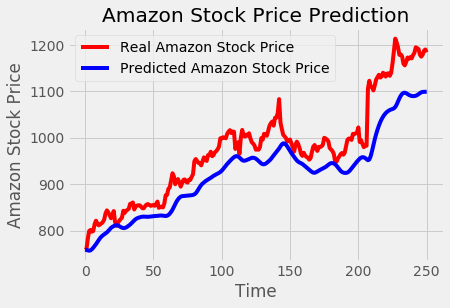

In [28]:
# Visualizing the results for GRU
plot_predictions(test_set,GRU_predicted_stock_price)

This code generates a visualization of the predicted stock prices from a GRU model and compares them to the actual stock prices.

It calls the function 'plot_predictions' and passes two parameters: 'test_set' and 'GRU_predicted_stock_price'. The 'test_set' represents the actual stock prices, while 'GRU_predicted_stock_price' contains the predicted stock prices from the GRU model.

The 'plot_predictions' function uses the 'matplotlib.pyplot' library to create a plot. It plots the 'test_set' as a red line to represent the actual stock prices. Additionally, it plots the 'GRU_predicted_stock_price' as a blue line to represent the predicted stock prices.

The plot is titled 'Amazon Stock Price Prediction' using the 'plt.title' function. The x-axis is labeled as 'Time' with the 'plt.xlabel' function, and the y-axis is labeled as 'Amazon Stock Price' with the 'plt.ylabel' function. The 'plt.legend' function adds a legend to the plot to differentiate between the actual and predicted stock prices.

Finally, the plot is displayed on the screen using the 'plt.show' function.

In summary, this code visualizes the predicted stock prices from a GRU model and compares them to the actual stock prices. The plot helps to visualize the accuracy of the model's predictions and understand the trend and pattern of the stock prices.

In [37]:
# The LSTM architecture
regressorLG = Sequential()
# First LSTM layer with Dropout regularisation
regressorLG.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressorLG.add(Dropout(0.2))
regressorLG.add(GRU(units=50, activation='tanh'))
regressorLG.add(Dropout(0.2))
# The output layer
regressorLG.add(Dense(units=1))
# Compiling the RNN
regressorLG.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorLG.fit(X_train,y_train,epochs=5,batch_size=150)

Epoch 1/5
2708/2708 [==============================] - 4s 1ms/step - loss: 0.0640
Epoch 2/5
2708/2708 [==============================] - 2s 745us/step - loss: 0.0205
Epoch 3/5
2708/2708 [==============================] - 2s 720us/step - loss: 0.0052
Epoch 4/5
2708/2708 [==============================] - 2s 726us/step - loss: 0.0023
Epoch 5/5
2708/2708 [==============================] - 2s 800us/step - loss: 0.0020


This code defines and trains a specific type of recurrent neural network (RNN) architecture that combines LSTM and GRU layers for a regression task.

The code starts by creating an empty sequential model called 'regressorLG' using the 'Sequential' class from the Keras library. This model will serve as the container for the LSTM and GRU layers and other components.

Next, the code adds an LSTM layer to the model using the 'regressorLG.add' function. The 'units' parameter specifies the number of memory cells or units in the LSTM layer. The 'return_sequences' parameter is set to 'True' to indicate that the layer should return sequences. The 'input_shape' parameter is based on the shape of 'X_train' and specifies the shape of the input data. This LSTM layer is followed by a dropout layer with a dropout rate of 0.2. Dropout is a regularization technique that helps prevent overfitting in neural networks.

After the LSTM layer, a GRU layer is added to the model using the 'regressorLG.add' function. The 'units' parameter specifies the number of memory cells or units in the GRU layer. The 'activation' parameter is set to 'tanh', which is the activation function used in the GRU layer. Another dropout layer is added after the GRU layer with a dropout rate of 0.2.

Following the GRU layer and dropout layer, an output layer is added using the 'regressorLG.add' function. It consists of a dense layer with a single unit. This layer is responsible for producing the regression output.

The next step involves compiling the RNN model using the 'regressorLG.compile' function. The 'optimizer' parameter is set to 'SGD', which stands for Stochastic Gradient Descent, and specific parameters are provided to configure the optimizer, such as the learning rate ('lr'), decay, momentum, and Nesterov momentum. The 'loss' parameter is set to 'mean_squared_error', indicating that the mean squared error is used as the loss function to measure the model's performance.

Finally, the model is trained using the 'regressorLG.fit' function. It takes the preprocessed training data ('X_train' and 'y_train') as input, along with additional parameters such as the number of epochs (5) and the batch size (150). During the training process, the model iteratively adjusts its weights and biases to minimize the mean squared error loss between the predicted and actual values.

In summary, this code defines and trains an RNN model with a combination of LSTM and GRU layers for regression. The model architecture consists of an LSTM layer, a dropout layer, a GRU layer, another dropout layer, and an output layer. The model is compiled with a specific optimizer and loss function and is trained using the provided training data.

In [38]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
LG_predicted_stock_price = regressorLG.predict(X_test)
LG_predicted_stock_price = sc.inverse_transform(LG_predicted_stock_price)

This code prepares the input data for testing and uses a trained LSTM-GRU hybrid model to predict stock prices.

First, an empty list called 'X_test' is created to store the input sequences for testing.

Using a for loop, the code iterates over a range of indices from 60 to 311. This range represents the indices of the 'inputs' array, which was previously prepared and scaled.

Within each iteration, the code appends a sequence of 60 consecutive elements from the 'inputs' array to the 'X_test' list. The sequence is obtained by using the slicing notation '[i-60:i,0]', which selects a range of values from index 'i-60' to 'i' in the first column (index 0) of the 'inputs' array. These sequences serve as input data for making predictions.

After the loop completes, the 'X_test' list is converted into a NumPy array using the 'np.array' function.

Next, the 'X_test' array is reshaped to match the input shape expected by the trained LSTM-GRU model. The reshaping is performed using the 'np.reshape' function, with the desired shape specified as (X_test.shape[0], X_test.shape[1], 1). This ensures that the dimensions of the 'X_test' array align with the number of samples, the length of each sequence, and the number of features (in this case, 1).

The trained LSTM-GRU model, 'regressorLG', is then used to predict the stock prices based on the prepared 'X_test' input. The 'predict' method is called on 'regressorLG' with 'X_test' as the input, resulting in an array of predicted stock prices.

To obtain the actual stock price values from the predicted values, the 'inverse_transform' method is applied to the 'LG_predicted_stock_price' array. This method uses the scaling transformation applied earlier to revert the scaled values back to their original scale.

In summary, this code prepares the input data for testing by creating sequences from the scaled 'inputs' array. It reshapes the 'X_test' array to match the input shape expected by the LSTM-GRU model. The trained LSTM-GRU model is then used to predict the stock prices for the prepared 'X_test' input. Finally, the predicted stock prices are transformed back to their original scale.

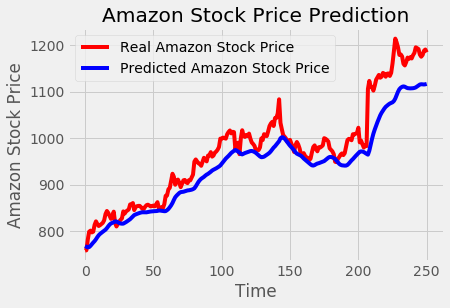

In [39]:
# Visualizing the results for GRU
plot_predictions(test_set,LG_predicted_stock_price)

This code generates a visualization of the predicted stock prices from a LSTM-GRU hybrid model and compares them to the actual stock prices.

It calls the function 'plot_predictions' and passes two parameters: 'test_set' and 'LG_predicted_stock_price'. The 'test_set' represents the actual stock prices, while 'LG_predicted_stock_price' contains the predicted stock prices from the LSTM-GRU model.

The 'plot_predictions' function uses the 'matplotlib.pyplot' library to create a plot. It plots the 'test_set' as a red line to represent the actual stock prices. Additionally, it plots the 'LG_predicted_stock_price' as a blue line to represent the predicted stock prices.

The plot is titled 'Amazon Stock Price Prediction' using the 'plt.title' function. The x-axis is labeled as 'Time' with the 'plt.xlabel' function, and the y-axis is labeled as 'Amazon Stock Price' with the 'plt.ylabel' function. The 'plt.legend' function adds a legend to the plot to differentiate between the actual and predicted stock prices.

Finally, the plot is displayed on the screen using the 'plt.show' function.

In summary, this code visualizes the predicted stock prices from a LSTM-GRU hybrid model and compares them to the actual stock prices. The plot helps to visualize the accuracy of the model's predictions and understand the trend and pattern of the stock prices.

In [43]:
X_train

array([[[0.02625136],
        [0.02610518],
        [0.02667771],
        ...,
        [0.01140198],
        [0.01184052],
        [0.01280287]],

       [[0.02610518],
        [0.02667771],
        [0.02714061],
        ...,
        [0.01184052],
        [0.01280287],
        [0.0129125 ]],

       [[0.02667771],
        [0.02714061],
        [0.02533773],
        ...,
        [0.01280287],
        [0.0129125 ],
        [0.01275414]],

       ...,

       [[0.99104652],
        [0.99409192],
        [0.99812403],
        ...,
        [0.90741981],
        [0.90168228],
        [0.91161029]],

       [[0.99409192],
        [0.99812403],
        [1.        ],
        ...,
        [0.90168228],
        [0.91161029],
        [0.91812744]],

       [[0.99812403],
        [1.        ],
        [0.99846512],
        ...,
        [0.91161029],
        [0.91812744],
        [0.91008759]]])

The code snippet provided does not show the complete definition or assignment of the variable 'X_train'. Without the complete code or context, it is not possible to explain what this specific line of code does in plain English. 

In general, the variable 'X_train' typically represents the input data or features used for training a machine learning model. It is common to preprocess and prepare the training data, which may involve steps such as scaling, reshaping, and extracting relevant features, before assigning it to 'X_train'. However, the specific operations performed on 'X_train' can vary depending on the context and the requirements of the machine learning model being trained.

In [91]:
import pandas as pd
import quandl
import datetime
start = datetime.datetime(2018,1,1)
end = datetime.date.today()
amz = quandl.get("WIKI/AMZN", start_date=start, end_date=end)


This code snippet performs a series of actions to retrieve historical stock price data for Amazon from the Quandl database and store it in a pandas DataFrame. 

First, the code imports the pandas library, which is widely used for data manipulation and analysis. The pandas library provides data structures and functions that facilitate working with structured data.

Next, the code imports the quandl library, which is a data platform that offers access to a vast array of financial, economic, and alternative datasets. Quandl provides a convenient interface to retrieve data from various sources, including stock market data.

The code also imports the datetime module, which is part of the Python standard library and provides classes for manipulating dates and times. It is used to define the start and end dates for retrieving the stock price data.

Using the datetime module, the code creates a start date variable called 'start' by calling the datetime.datetime class and specifying the year, month, and day as January 1, 2018. This sets the beginning of the desired time range for retrieving the data.

Similarly, the code creates an end date variable called 'end' by calling the datetime.date class. The datetime.date.today() function is used to obtain the current date, which sets the end of the desired time range for retrieving the data.

The quandl.get function is then used to retrieve the stock price data for Amazon. The function takes the following parameters: the dataset code (in this case, "WIKI/AMZN" representing Amazon's stock prices), the start date (specified as 'start'), and the end date (specified as 'end'). This function call retrieves the stock price data within the specified time range from the Quandl database.

The retrieved data is stored in a pandas DataFrame called 'amz'. A DataFrame is a two-dimensional labeled data structure provided by pandas that organizes data in rows and columns, allowing for efficient manipulation and analysis of the data.

In summary, this code snippet utilizes the pandas and quandl libraries along with the datetime module to retrieve historical stock price data for Amazon from the Quandl database. The retrieved data is then stored in a pandas DataFrame named 'amz', enabling further analysis and manipulation of the data.

In [92]:
amz=amz[["Open","High","Low","Close","Volume"]]

This code snippet selects specific columns from the 'amz' DataFrame and assigns the result back to the 'amz' variable.

The DataFrame 'amz' likely contains multiple columns representing various attributes or features of the Amazon stock price data. In this code, a subset of columns is extracted and retained, while the rest of the columns are discarded.

The columns being selected are "Open", "High", "Low", "Close", and "Volume". These columns likely represent the opening price, highest price, lowest price, closing price, and trading volume of Amazon stock, respectively.

By specifying these column names within double square brackets, the code creates a new DataFrame that contains only these selected columns. This new DataFrame, which includes only the desired columns, is then assigned back to the 'amz' variable, overwriting the original DataFrame.

In summary, this code narrows down the 'amz' DataFrame to include only the columns related to the opening price, highest price, lowest price, closing price, and trading volume of Amazon stock. The resulting DataFrame focuses on these specific attributes, enabling further analysis or processing with the reduced set of columns.

In [76]:
dataset.tail()

Open     High      Low    Close   Volume  Name
Date                                                         
2017-12-22  1172.08  1174.62  1167.83  1168.36  1585054  AMZN
2017-12-26  1168.36  1178.32  1160.55  1176.76  2005187  AMZN
2017-12-27  1179.91  1187.29  1175.61  1182.26  1867208  AMZN
2017-12-28  1189.00  1190.10  1184.38  1186.10  1841676  AMZN
2017-12-29  1182.35  1184.00  1167.50  1169.47  2688391  AMZN

This code retrieves the last few rows of data from the 'dataset' DataFrame.

The 'tail()' function is called on the 'dataset' DataFrame, which is likely a pandas DataFrame containing a dataset of some sort. By default, the 'tail()' function returns the last 5 rows of the DataFrame.

The purpose of using 'tail()' is to examine the most recent observations or entries in the dataset. This can be useful for gaining insights into recent trends, patterns, or values in the data.

In summary, this code snippet retrieves the last few rows of data from the 'dataset' DataFrame, allowing for a quick view of the most recent records in the dataset.

In [94]:
amz.tail(50)

Open     High      Low    Close      Volume
Date                                                      
2018-01-16  1323.00  1339.94  1292.30  1304.86   7111172.0
2018-01-17  1312.24  1314.00  1280.88  1295.00   5166748.0
2018-01-18  1293.95  1304.60  1284.02  1293.32   3941007.0
2018-01-19  1312.00  1313.00  1292.99  1294.58   4395070.0
2018-01-22  1297.17  1327.45  1296.66  1327.31   3970151.0
2018-01-23  1338.09  1364.90  1337.34  1362.54   5056764.0
2018-01-24  1374.82  1388.16  1338.00  1357.51   6730084.0
2018-01-25  1368.00  1378.34  1357.62  1377.95   4621862.0
2018-01-26  1392.01  1402.53  1380.91  1402.05   4584082.0
2018-01-29  1409.18  1431.39  1400.44  1417.68   5628992.0
2018-01-30  1403.17  1439.25  1392.00  1437.82   5736512.0
2018-01-31  1451.30  1472.58  1450.04  1451.65   6220396.0
2018-02-01  1445.00  1459.88  1385.14  1390.00   7812953.0
2018-02-02  1477.39  1498.00  1414.00  1431.00  10915962.0
2018-02-05  1402.62  1458.98  1320.72  1396.62  10756332.0
2018-02-06  1361.46  1443.99  1351.79  1442.84  10773963.0
2018-02-07  1449.00  1460.99  1415.15  1416.78   7066828.0
2018-02-08  1429.67  1433.75  1349.94  1350.47   8108560.0
2018-02-09  1373.49  1383.50  1265.93  1338.99  13787886.0
2018-02-12  1364.67  1393.81  1344.01  1386.23   6682214.0
2018-02-13  1385.93  1419.72  1383.53  1414.51   5858860.0
2018-02-14  1406.25  1452.06  1403.36  1451.05   5881238.0
2018-02-15  1466.89  1468.94  1436.84  1461.76   5598111.0
2018-02-16  1457.37  1465.80  1446.56  1448.69   4410879.0
2018-02-20  1446.49  1488.77  1446.49  1468.35   6388374.0
2018-02-21  1485.00  1503.49  1478.92  1482.92   6216694.0
2018-02-22  1495.36  1502.54  1475.76  1484.76   4732555.0
2018-02-23  1495.34  1500.00  1486.50  1500.00   4327008.0
2018-02-26  1509.20  1522.84  1507.00  1521.95   4909053.0
2018-02-27  1524.50  1526.78  1507.21  1511.98   4708378.0
2018-02-28  1519.51  1528.70  1512.00  1512.45   4426580.0
2018-03-01  1513.60  1518.49  1465.00  1493.45   6835230.0
2018-03-02  1469.10  1501.05  1455.01  1500.25   6587564.0
2018-03-05  1494.24  1525.38  1481.00  1523.61   5233934.0
2018-03-06  1533.20  1542.13  1528.00  1537.64   4561718.0
2018-03-07  1526.52  1545.90  1522.51  1545.00   4174123.0
2018-03-08  1550.00  1554.88  1545.25  1551.86   3512528.0
2018-03-09  1563.50  1578.94  1559.08  1578.89   4417059.0
2018-03-12  1592.60  1605.33  1586.70  1598.39   5115886.0
2018-03-13  1615.96  1617.54  1578.01  1588.18   6427066.0
2018-03-14  1597.00  1606.44  1590.89  1591.00   4164395.0
2018-03-15  1595.00  1596.91  1578.11  1582.32   4026744.0
2018-03-16  1583.45  1589.44  1567.50  1571.68   5145054.0
2018-03-19  1554.53  1561.66  1525.35  1544.93   6376619.0
2018-03-20  1550.34  1587.00  1545.41  1586.51   4507049.0
2018-03-21  1586.45  1590.00  1563.17  1581.86   4667291.0
2018-03-22  1565.47  1573.85  1542.40  1544.10   6177737.0
2018-03-23  1539.01  1549.02  1495.36  1495.56   7843966.0
2018-03-26  1530.00  1556.99  1499.25  1555.86   5547618.0
2018-03-27  1572.40  1575.96  1482.32  1497.05   6793279.0

This code retrieves the last 50 rows of data from the 'amz' DataFrame.

The 'tail()' function is called on the 'amz' DataFrame, which is likely a pandas DataFrame containing stock price data for Amazon. By specifying the argument '50' within the parentheses, the function returns the last 50 rows of the DataFrame.

The purpose of using 'tail(50)' is to examine the most recent 50 observations or entries in the 'amz' DataFrame. This allows for a closer inspection of the more recent data points, which can be useful for analyzing recent trends, patterns, or values in the stock price data.

In summary, this code snippet retrieves the last 50 rows of data from the 'amz' DataFrame, providing a closer look at the most recent records in the stock price data for Amazon.

In [88]:
merge=pd.merge(dataset,amz, how='outer')
merge.tail()

Open     High      Low    Close     Volume Name
3073  1586.45  1590.00  1563.17  1581.86  4667291.0  NaN
3074  1565.47  1573.85  1542.40  1544.10  6177737.0  NaN
3075  1539.01  1549.02  1495.36  1495.56  7843966.0  NaN
3076  1530.00  1556.99  1499.25  1555.86  5547618.0  NaN
3077  1572.40  1575.96  1482.32  1497.05  6793279.0  NaN

This code merges two DataFrames, 'dataset' and 'amz', using an outer join operation and retrieves the last few rows of the resulting merged DataFrame.

The 'merge' variable represents the merged DataFrame. The 'pd.merge' function from the pandas library is used to combine the two DataFrames. The 'dataset' DataFrame likely contains some data related to Amazon stock prices, while the 'amz' DataFrame likely contains additional information or features related to Amazon.

By specifying 'how='outer'' as an argument, an outer join operation is performed. This means that all rows from both DataFrames are included in the merged DataFrame, and missing values are filled with 'NaN' (null) if there are no corresponding values in one of the DataFrames for a specific row.

After the merge operation, the 'tail()' function is called on the 'merge' DataFrame. By default, 'tail()' returns the last 5 rows of the DataFrame, allowing for a quick examination of the most recent records in the merged DataFrame.

In summary, this code merges the 'dataset' and 'amz' DataFrames using an outer join operation, combining the data from both sources. The resulting merged DataFrame is then used to retrieve the last few rows, providing insight into the most recent records in the merged data.

In [89]:
m = pd.concat([dataset,amz])

This code concatenates (combines) two DataFrames, 'dataset' and 'amz', and assigns the concatenated result to the variable 'm'.

The 'pd.concat' function from the pandas library is used to perform the concatenation. The 'concat' function takes a sequence or list of DataFrames as its argument. In this case, the 'dataset' DataFrame and the 'amz' DataFrame are provided as arguments within square brackets, indicating that they should be concatenated.

The concatenation operation vertically stacks the rows of the two DataFrames, placing the rows of 'amz' below the rows of 'dataset'. The resulting DataFrame, 'm', includes all the rows and columns from both 'dataset' and 'amz'.

Concatenation is useful when you want to combine multiple DataFrames with the same columns but different rows, allowing you to merge or consolidate data from different sources into a single DataFrame.

In summary, this code concatenates the 'dataset' DataFrame and the 'amz' DataFrame, stacking their rows vertically to create a new DataFrame called 'm' that includes all the rows and columns from both original DataFrames.

In [90]:
m.tail()

Close     High      Low Name     Open     Volume
Date                                                          
2018-03-21  1581.86  1590.00  1563.17  NaN  1586.45  4667291.0
2018-03-22  1544.10  1573.85  1542.40  NaN  1565.47  6177737.0
2018-03-23  1495.56  1549.02  1495.36  NaN  1539.01  7843966.0
2018-03-26  1555.86  1556.99  1499.25  NaN  1530.00  5547618.0
2018-03-27  1497.05  1575.96  1482.32  NaN  1572.40  6793279.0

This code retrieves the last few rows of data from the DataFrame 'm'.

The 'tail()' function is called on the 'm' DataFrame, which is the concatenated DataFrame created from the previous operation. By default, the 'tail()' function returns the last 5 rows of the DataFrame.

The purpose of using 'tail()' is to examine the most recent observations or entries in the DataFrame 'm'. This can be helpful for understanding the latest data points or trends in the combined data from 'dataset' and 'amz'.

In summary, this code snippet retrieves the last few rows of data from the DataFrame 'm', allowing for a quick view of the most recent records in the combined data from 'dataset' and 'amz'.

In [95]:
training_set = m[:'2016'].iloc[:,1:2].values
test_set = m['2018':].iloc[:,1:2].values

This code splits the 'm' DataFrame into two separate datasets, namely 'training_set' and 'test_set', based on specific time periods.

The first line of code assigns the values from the 'm' DataFrame to the 'training_set' variable. It selects rows up to the year 2016, inclusive, using the slicing notation '[:'2016']'. The '.iloc[:,1:2]' notation specifies that only the values from the second column (index 1) of the DataFrame should be included. The '.values' attribute converts the selected data into a NumPy array.

The second line of code assigns the values from the 'm' DataFrame to the 'test_set' variable. It selects rows starting from the year 2018 using the slicing notation "['2018':]". Again, only the values from the second column (index 1) of the DataFrame are included, and the resulting data is converted into a NumPy array.

In summary, this code divides the 'm' DataFrame into a training set and a test set. The training set contains the data up to the year 2016, while the test set includes the data from the year 2018 onwards. Both sets only retain the values from the second column of the DataFrame. The resulting training and test sets are stored as NumPy arrays for further processing or analysis.

In [107]:
training_set = amz[:'2016'].iloc[:,1:2].values
test_set = amz['2018':].iloc[:,1:2].values

This code splits the 'amz' DataFrame into two separate datasets, namely 'training_set' and 'test_set', based on specific time periods.

The first line of code assigns the values from the 'amz' DataFrame to the 'training_set' variable. It selects rows up to the year 2016, inclusive, using the slicing notation '[:'2016']'. The '.iloc[:,1:2]' notation specifies that only the values from the second column (index 1) of the DataFrame should be included. The '.values' attribute converts the selected data into a NumPy array.

The second line of code assigns the values from the 'amz' DataFrame to the 'test_set' variable. It selects rows starting from the year 2018 using the slicing notation "['2018':]". Again, only the values from the second column (index 1) of the DataFrame are included, and the resulting data is converted into a NumPy array.

In summary, this code divides the 'amz' DataFrame into a training set and a test set. The training set contains the data up to the year 2016, while the test set includes the data from the year 2018 onwards. Both sets only retain the values from the second column of the DataFrame. The resulting training and test sets are stored as NumPy arrays for further processing or analysis.

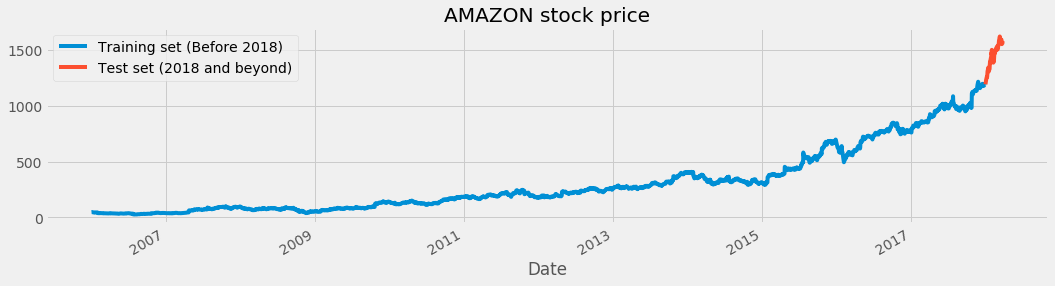

In [111]:
amz["High"][:'2017'].plot(figsize=(16,4),legend=True)
amz["High"]['2018':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2018)','Test set (2018 and beyond)'])
plt.title('AMAZON stock price')
plt.show()

This code generates a plot to visualize the historical stock prices of Amazon, specifically the "High" attribute.

The first line of code plots the "High" attribute of the 'amz' DataFrame, limiting the data up to the year 2017. The '[:'2017']' slicing notation selects the rows from the beginning of the DataFrame up to the year 2017. The 'plot' function is called with additional parameters, such as 'figsize=(16,4)' to set the size of the plot, and 'legend=True' to display a legend.

The second line of code plots the "High" attribute of the 'amz' DataFrame, starting from the year 2018. The slicing notation "['2018':]" selects the rows from the year 2018 onwards.

The 'plt.legend' function is used to add a legend to the plot, with labels specifying the training set and test set periods. The 'plt.title' function sets the title of the plot as "AMAZON stock price".

Finally, the 'plt.show' function displays the plot on the screen.

In summary, this code generates a plot that visualizes the historical stock prices of Amazon. It shows two lines representing the "High" attribute: one line for the training set up until the year 2017, and another line for the test set starting from the year 2018. The plot includes a legend, a title, and is displayed on the screen.

In [112]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

This code performs scaling on the training set data to normalize the values within a specific range.

First, it creates an instance of the MinMaxScaler class from the scikit-learn library. This scaler is commonly used for feature scaling, where it transforms the data to a specified range. In this case, the feature range is set to (0, 1), meaning the scaled values will be between 0 and 1.

The 'fit_transform' method is then called on the scaler object, with 'training_set' as the input. This method fits the scaler to the training set data and applies the scaling transformation to it.

The resulting scaled data is stored in the 'training_set_scaled' variable. It contains the same data as the original training set, but with scaled values that fall within the specified feature range.

In summary, this code scales the values in the training set using the MinMaxScaler, ensuring that the scaled values are between 0 and 1. The scaled data is stored in the 'training_set_scaled' variable, ready to be used for further analysis or model training.

In [113]:
X_train = []
y_train = []
for i in range(60,2768):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

This code prepares the training data for a machine learning model by creating input sequences and corresponding target values.

The code initializes empty lists, 'X_train' and 'y_train', to store the input sequences and target values, respectively.

Using a for loop, it iterates over a range of indices from 60 to 2767 (both inclusive). These indices represent the starting points of the input sequences in the 'training_set_scaled' data.

Within each iteration, the code appends a slice of the 'training_set_scaled' data to the 'X_train' list. This slice represents a sequence of 60 consecutive values (from i-60 to i) from the first column (index 0) of the 'training_set_scaled' data. Each appended slice becomes an input sequence.

Simultaneously, the code appends a single value from the 'training_set_scaled' data (at index i) to the 'y_train' list. This value represents the target value corresponding to the input sequence.

After the loop finishes, the 'X_train' and 'y_train' lists are converted into NumPy arrays using the 'np.array' function. This conversion is done to facilitate further processing and model training.

In summary, this code creates input sequences and corresponding target values for training a machine learning model. It iterates over the 'training_set_scaled' data, selects consecutive sequences of 60 values as input, and appends them to 'X_train', while appending the corresponding target values to 'y_train'. The resulting 'X_train' and 'y_train' are NumPy arrays, ready to be used for model training.

In [114]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

This code reshapes the 'X_train' array to fit the expected input shape for a specific machine learning model.

The 'X_train' array represents the input sequences for training the model. Each input sequence is a set of 60 values, and the array has a shape of (num_sequences, sequence_length).

Using the 'np.reshape' function from the NumPy library, the code modifies the shape of the 'X_train' array. The new shape is specified as (X_train.shape[0], X_train.shape[1], 1), where 'X_train.shape[0]' refers to the number of input sequences and 'X_train.shape[1]' represents the length of each sequence.

The additional dimension of 1 at the end indicates that each value in the input sequence is treated as a separate feature or channel. This is often necessary when working with certain types of machine learning models, such as Convolutional Neural Networks (CNNs) or Recurrent Neural Networks (RNNs).

By reshaping the 'X_train' array in this way, the data is prepared to be fed into the model for training, adhering to the required input shape.

In summary, this code adjusts the shape of the 'X_train' array to match the expected input format for a specific machine learning model. The new shape includes the number of input sequences, the length of each sequence, and an additional dimension indicating the number of features or channels.

In [115]:
# The LSTM architecture
regressorLG = Sequential()
# First LSTM layer with Dropout regularisation
regressorLG.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressorLG.add(Dropout(0.2))
regressorLG.add(GRU(units=50, activation='tanh'))
regressorLG.add(Dropout(0.2))
# The output layer
regressorLG.add(Dense(units=1))
# Compiling the RNN
regressorLG.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorLG.fit(X_train,y_train,epochs=5,batch_size=150)

Epoch 1/5
2708/2708 [==============================] - 4s 2ms/step - loss: 0.0693
Epoch 2/5
2708/2708 [==============================] - 2s 728us/step - loss: 0.0192
Epoch 3/5
2708/2708 [==============================] - 2s 749us/step - loss: 0.0035
Epoch 4/5
2708/2708 [==============================] - 2s 757us/step - loss: 0.0022
Epoch 5/5
2708/2708 [==============================] - 2s 730us/step - loss: 0.0022


The provided code defines and trains a hybrid model that combines Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) layers for regression tasks. The model is built using the Sequential class from the Keras library, allowing for a sequential layer-by-layer construction.

First, an instance of the Sequential class is created and assigned to the variable 'regressorLG'. This instance will serve as the container for the model's layers.

The model architecture is then defined by adding layers to the 'regressorLG' model. The first layer added is an LSTM layer with 50 units. This layer is set to return sequences (return_sequences=True), and it expects input data with a shape of (X_train.shape[1], 1), where X_train.shape[1] represents the length of each input sequence.

Following the LSTM layer, a dropout layer is added. The purpose of this layer is to prevent overfitting by randomly dropping out a fraction of input units during training. In this case, the dropout rate is set to 0.2.

Next, a GRU layer with 50 units is added to the model. GRU is a type of recurrent neural network (RNN) that can capture temporal dependencies in the data. The GRU layer uses the hyperbolic tangent (tanh) activation function.

Another dropout layer, with the same dropout rate of 0.2, is added after the GRU layer. This additional dropout layer contributes to regularizing the model and reducing overfitting.

The output layer of the model is a dense layer with 1 unit. This layer produces the final regression prediction.

The model is compiled using the stochastic gradient descent (SGD) optimizer. The optimizer is configured with specific parameters, including the learning rate (lr), decay, momentum, and Nesterov momentum. These parameters control how the optimizer adjusts the model's weights during training.

The chosen loss function for the model is mean squared error (MSE). MSE measures the difference between the predicted and actual values. It is commonly used for regression tasks.

Finally, the model is trained on the training data (X_train and y_train) for 5 epochs. The training is performed in batches, with a batch size of 150. During training, the model adjusts its weights to minimize the MSE loss between the predicted and actual values.

In summary, the provided code constructs a hybrid LSTM-GRU model for regression tasks. It defines the architecture of the model by adding LSTM and GRU layers, applies dropout regularization, compiles the model with SGD optimizer and MSE loss, and trains the model on the training data.

In [116]:
dataset_total = pd.concat((dataset["High"][:'2017'],dataset["High"]['2018':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

This code combines the "High" attribute data from two different periods of the 'dataset' DataFrame and prepares it for further processing.

The first line of code concatenates the "High" attribute values from two time periods: from the beginning of the DataFrame up to the year 2017 ('dataset["High"][:'2017']') and from the year 2018 onwards ('dataset["High"]['2018':']'). The 'pd.concat' function is used to concatenate the data along the 0 axis (rows) using the 'axis=0' parameter. The resulting concatenated data is stored in the 'dataset_total' variable.

The second line of code selects a portion of the 'dataset_total' data that corresponds to the length of the 'test_set' plus 60 additional values. This selection is made using the slicing notation '[len(dataset_total)-len(test_set) - 60:]'. The 'len(dataset_total)-len(test_set) - 60' expression calculates the starting index of the desired data. The '.values' attribute converts the selected data into a NumPy array, which is then assigned to the 'inputs' variable.

The third line of code reshapes the 'inputs' array to have a shape of (-1, 1). The '-1' indicates that the size of that dimension is inferred based on the length of the data and the other specified dimension, which is 1 in this case. Reshaping to (-1, 1) is often done to prepare the data for scaling or modeling purposes.

The fourth line of code applies scaling to the reshaped 'inputs' data using the 'sc' MinMaxScaler object. The 'transform' method of the scaler is called to perform the scaling operation, and the transformed data is reassigned to the 'inputs' variable.

In summary, this code concatenates the "High" attribute data from two different time periods in the 'dataset' DataFrame to create 'dataset_total'. Then it selects a specific portion of the concatenated data as 'inputs', reshapes it, and applies scaling using the 'sc' MinMaxScaler object. The resulting scaled data is stored in the 'inputs' variable for further use in the analysis or modeling process.

In [122]:
len(inputs)

119

This code returns the length of the 'inputs' data, which represents the number of elements in the 'inputs' array.

The 'len' function is used to determine the length of the 'inputs' array. It counts and returns the number of elements present in the array.

In summary, this code simply calculates and provides the total number of elements in the 'inputs' array.

In [124]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,119):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
LG_predicted_stock_price = regressorLG.predict(X_test)
LG_predicted_stock_price = sc.inverse_transform(LG_predicted_stock_price)

This code prepares the test data and makes predictions for the stock prices using a trained model.

The code initializes an empty list, 'X_test', to store the test input sequences. It then iterates over a range of indices from 60 to 118 (both inclusive) using a for loop.

Within each iteration, a slice of the 'inputs' data is appended to the 'X_test' list. The slice represents a sequence of 60 consecutive values, starting from index i-60 and ending at index i. Only the values from the first column (index 0) of the 'inputs' data are included in the slice. Each appended slice becomes an input sequence for testing.

After the loop finishes, the 'X_test' list is converted into a NumPy array using 'np.array'. This conversion is done to facilitate further processing and model input requirements.

The next line of code reshapes the 'X_test' array to match the expected input shape for the model. The new shape is specified as (X_test.shape[0], X_test.shape[1], 1), where 'X_test.shape[0]' represents the number of test input sequences, 'X_test.shape[1]' represents the length of each sequence (60 in this case), and the additional dimension of 1 indicates that each value in the sequence is treated as a separate feature or channel.

The 'regressorLG.predict' function is then used to make predictions on the reshaped 'X_test' data. This function applies the trained 'regressorLG' model to the test data and returns the predicted values for the stock prices.

Finally, the predicted stock prices are inverse-transformed using the 'sc' MinMaxScaler object. This step is necessary to obtain the predicted prices in their original scale and units. The inverse-transformed predicted prices are stored in the 'LG_predicted_stock_price' variable for further analysis or evaluation.

In summary, this code prepares the test data by creating input sequences from the 'inputs' data. It then reshapes the test data to match the model's input requirements, makes predictions on the reshaped test data using the 'regressorLG' model, and obtains the predicted stock prices in their original scale by inverse-transforming them using the 'sc' MinMaxScaler object. The predicted prices are stored in 'LG_predicted_stock_price' for further use.

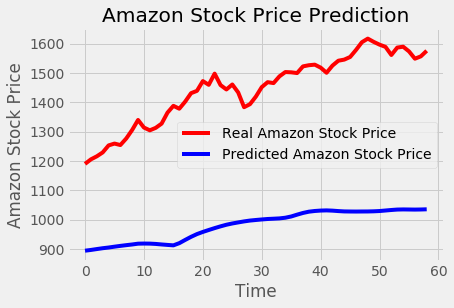

In [125]:
# Visualizing the results for GRU
plot_predictions(test_set,LG_predicted_stock_price)

This code visualizes the results of the GRU model by plotting the actual and predicted stock prices.

The 'plot_predictions' function is called, passing the 'test_set' (actual stock prices) and 'LG_predicted_stock_price' (predicted stock prices) as arguments.

Inside the 'plot_predictions' function, a line plot is created to display the actual stock prices in red and the predicted stock prices in blue. The 'test_set' represents the x-axis values, which correspond to the time periods or data points, while the 'LG_predicted_stock_price' represents the y-axis values, which indicate the predicted stock prices.

The resulting plot visually shows the comparison between the actual stock prices and the predicted stock prices generated by the GRU model. By visualizing the results, it becomes easier to assess the performance of the model in capturing the patterns and trends in the stock price data.

In summary, this code generates a plot to visualize and compare the actual and predicted stock prices obtained from the GRU model. The plot helps evaluate the accuracy and effectiveness of the model's predictions.